# 1. 데이터 읽기

In [2]:
#colab에서 csv파일은 용량이 작아 직접업로드 하는것도 시간이 얼마 걸리지 않지만 
#이미지나 weigths처럼 용량이 큰 데이터는 구글드라이브에 업로드 한 뒤 unzip해서 가져오는게 훨씬 편하다.
#중간에 다운되면서 런타임이 다시 연결될 때도 유용하고 매번 새로시작할 때마다 업로드 해아하는 귀찮음이 없어진다.  

!unzip /content/drive/MyDrive/elicer_col_name.zip -d /content/elice_배달데이터

Archive:  /content/drive/MyDrive/elicer_col_name.zip
  inflating: /content/elice_배달데이터/elicer_2019_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_1_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_2_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2021_col_name.csv  


In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import missingno as msno
import folium #지도출력 라이브러리

#iplot사용
#interactive한 그래프를 그릴 수 있다.
import plotly.graph_objs as go 
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
#stackoverflow
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## 1.1 데이터 불러오기

In [7]:
#이유는 모르겠지만,,2020_1데이터와 2021데이터는 utf-8 인코딩이 안된다.
#group하기 쉽도록 날짜를 datetime형식으로 읽어오기. 혹은 날짜를 년/월/일로 따로 분리하여 저장하는 후가공을 거치는 것도 생각중. 어느것이 더 편할까?
#특정 월과 연을 따로 호출하는 쿼리가 많다면 년/월/일로 나누어 저장하는 것이 효율적일것 같다.
df_2019=pd.read_csv("/content/elice_배달데이터/elicer_2019_col_name.csv", parse_dates=['날짜'])
df_2020_1=pd.read_csv("/content/elice_배달데이터/elicer_2020_1_col_name.csv", encoding = 'cp949', parse_dates=['날짜'])
df_2020_2=pd.read_csv("/content/elice_배달데이터/elicer_2020_2_col_name.csv", parse_dates=['날짜'])
df_2021=pd.read_csv("/content/elice_배달데이터/elicer_2021_col_name.csv", encoding = 'cp949', parse_dates=['날짜'])

In [37]:
df_2019.head()
# df_2019[df_2019['날짜']<='2019-07-31'] #2019년은 8월 1일부터 존재

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4


In [33]:
df_2021.tail() #2021년은 1월 1일부터 8월 31까지 존재

,날짜,시간대,광역시도,시군구,읍면동,배달건수
707638,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
707639,2021-08-31,23,충청북도,제천시,신백동,6
707640,2021-08-31,23,충청북도,제천시,신월동,2
707641,2021-08-31,23,충청북도,제천시,천남동,1
707642,2021-08-31,23,충청북도,제천시,하소동,4


In [9]:
df_2020_2.head()

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2020-07-01,0,경기도,고양시 덕양구,삼송동,2
1,2020-07-01,0,경기도,고양시 덕양구,토당동,1
2,2020-07-01,0,경기도,고양시 덕양구,행신동,16
3,2020-07-01,0,경기도,고양시 덕양구,화정동,22
4,2020-07-01,0,경기도,고양시 일산서구,일산동,1


In [10]:
df_2019.info() #날짜를 datetime타입으로 읽어옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426972 entries, 0 to 426971
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   날짜      426972 non-null  datetime64[ns]
 1   시간대     426972 non-null  int64         
 2   광역시도    426972 non-null  object        
 3   시군구     426972 non-null  object        
 4   읍면동     426972 non-null  object        
 5   배달건수    426972 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 19.5+ MB


In [11]:
df_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593847 entries, 0 to 593846
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   날짜      593847 non-null  datetime64[ns]
 1   시간대     593847 non-null  int64         
 2   광역시도    593847 non-null  object        
 3   시군구     593847 non-null  object        
 4   읍면동     593847 non-null  object        
 5   배달건수    593847 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.2+ MB


# 2. 데이터 정제

## 2.1 결측치 확인

In [12]:
print("2021-----\n",df_2021.isna().sum())
print("\n2020_2-----\n",df_2020_2.isna().sum())
print("\n2020_1-----\n",df_2020_1.isna().sum())
print("\n2019-----\n",df_2019.isna().sum())

2021-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_2-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_1-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2019-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44036 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44305 missing from current font.

/usr/local/lib/pyt

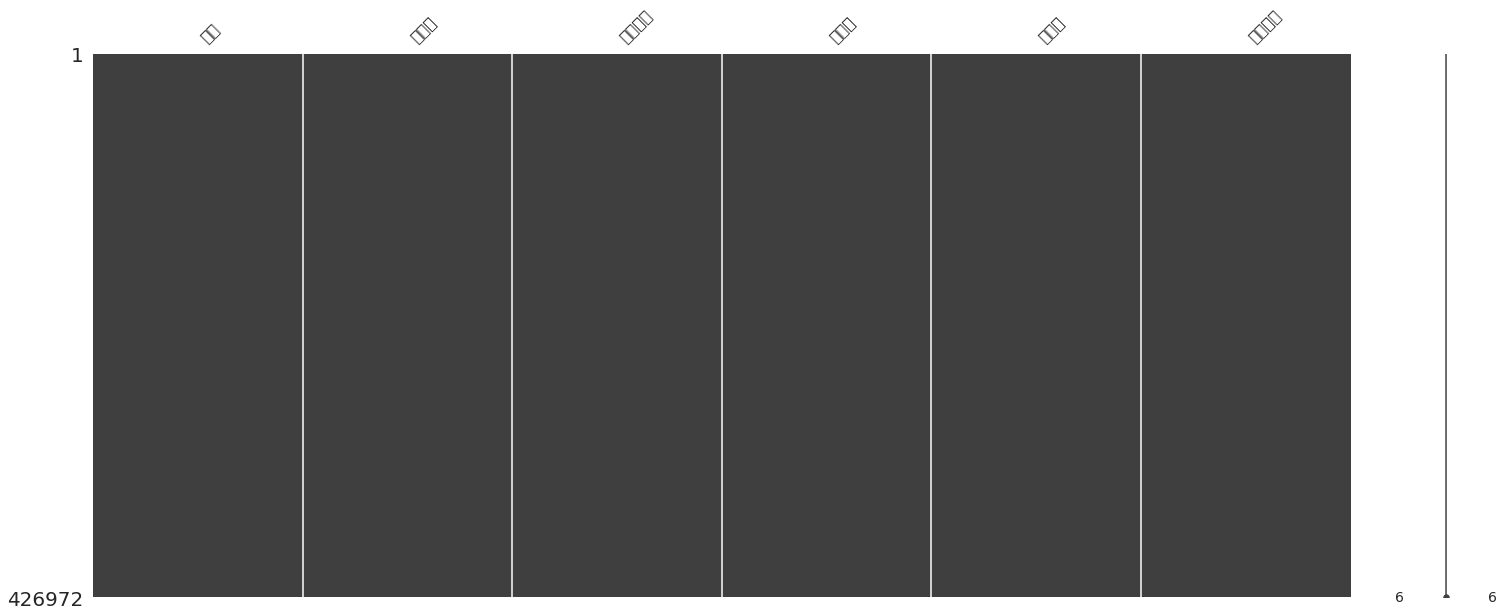

In [13]:
#missingno를 사용하면 한글(컬럼명)이 깨진다.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df_2019)
plt.show()

## 2.2 중복값 확인

In [14]:
#keep=False : 중복값 중 처음과 끝과 관계없이 중복이면 True
print("2021-----\n",df_2021[df_2021.duplicated(keep=False)])
print("\n2020_2-----\n",df_2020_2[df_2020_2.duplicated(keep=False)])
print("\n2020_1-----\n",df_2020_1[df_2020_1.duplicated(keep=False)])
print("\n2019-----\n",df_2019[df_2019.duplicated(keep=False)])

2021-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_2-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_1-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2019-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []


# 2.3 데이터 프레임 하나로 모으기

In [15]:
df = pd.concat([df_2019, df_2020_1, df_2020_2, df_2021], ignore_index=True)
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4
...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
2382977,2021-08-31,23,충청북도,제천시,신백동,6
2382978,2021-08-31,23,충청북도,제천시,신월동,2
2382979,2021-08-31,23,충청북도,제천시,천남동,1


In [30]:
df_2020 = pd.concat([df_2020_1, df_2020_2], ignore_index=True)
df_2020

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2020-01-01,0,경기도,고양시 덕양구,토당동,2
1,2020-01-01,0,경기도,고양시 덕양구,행신동,16
2,2020-01-01,0,경기도,고양시 덕양구,화정동,28
3,2020-01-01,0,경기도,고양시 일산동구,마두동,6
4,2020-01-01,0,경기도,고양시 일산동구,백석동,18
...,...,...,...,...,...,...
1248361,2020-12-31,23,충청북도,제천시,신백동,4
1248362,2020-12-31,23,충청북도,제천시,의림동,1
1248363,2020-12-31,23,충청북도,제천시,장락동,10
1248364,2020-12-31,23,충청북도,제천시,청전동,5


In [16]:
df.isna().sum()

날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382981 entries, 0 to 2382980
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   시간대     int64         
 2   광역시도    object        
 3   시군구     object        
 4   읍면동     object        
 5   배달건수    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 109.1+ MB


In [ ]:
## 저장 - 파일 용량이 너무 커서 엑셀로 로드가 안됨.
# df.to_csv("/content/elice_배달데이터/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")
# df.to_csv("/content/drive/MyDrive/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")

# 3. 데이터 시각화
무엇을 시각화 해야할까?
2019~2021까지 서울지역 구별 평균?
2019년도의 시간대별 평균?
2020년 시간대별 평균?


## 3.1 서울지역 시간대별

In [18]:
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '대전광역시', '서울특별시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도', '경상북도', '대구광역시', '부산광역시', '광주광역시', '인천광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [19]:
df_seoul = df[df['광역시도']=='서울특별시'].reset_index(drop=True)
df_seoul

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,서울특별시,구로구,개봉동,13
1,2019-08-01,0,서울특별시,구로구,고척동,4
2,2019-08-01,0,서울특별시,구로구,구로동,9
3,2019-08-01,0,서울특별시,구로구,오류동,3
4,2019-08-01,0,서울특별시,금천구,독산동,3
...,...,...,...,...,...,...
357208,2021-08-31,23,서울특별시,동작구,사당동,7
357209,2021-08-31,23,서울특별시,양천구,신정동,1
357210,2021-08-31,23,서울특별시,영등포구,신길동,5
357211,2021-08-31,23,서울특별시,영등포구,영등포동,1


In [20]:
#reset_index를 사용하면 각 row마다 index번호가 새롭게 부여되면서 groupby에 사용했던 key들이 index가 아니라 column의 형태가 된다. 후에 검색하기 편리!

# df_seoul_2019 = df_seoul[df_seoul['날짜']<'2020-01-01'].groupby('시간대').sum().reset_index()
df_seoul_2019 = df_2019[df_2019['광역시도']=='서울특별시'].groupby('시간대').sum().reset_index()
df_seoul_2019

,시간대,배달건수
0,0,12060
1,1,5845
2,2,1843
3,3,561
4,4,484
5,5,404
6,6,426
7,7,407
8,8,436
9,9,1803


In [21]:
#colab결과창에 그래프를 띄운다.
configure_plotly_browser_state()

init_notebook_mode(connected=True)

#plotly를 사용하면 interactive한 그래프로 나타낼 수 있다.
df_seoul_2019.iplot(kind="bar", 
                    y='배달건수',
                    x='시간대',
                    yTitle='배달건수',
                    xTitle='시간대',
                    title="2019 서울지역 시간대별 배달건수") 

## 3.2 서울 지역별

## 3.3 서울 월별

**계획**
* (서울지역) 같은 연도에서 어떤 월이 가장 배달을 많이 시켜먹었는지 월별 합 구하기
* (서울지역) 2019~2021 데이터를 월별로 묶고 같은 월끼리 비교하기
* (서울지역) 2019~2021 데이터를 월별로 묶고, 시간대 별로 묶어서 해당 월의 각 시간대의 배달건수 증감 그래프에 나타내기

  ⇒ *월 12 x 시간대 24 개를 모두 나타내면 복잡할 것 같으므로 top3만 각각 뽑아서 보여주는건 어떨지?*

<br/>

> plotly를 이용해 그래프 그릴 때 참고하면 좋은 블로그 
https://chancoding.tistory.com/96




In [22]:
#2019년도 서울데이터를 월별로 모으고 시간대별 합 구하기
df_seoul_2019_month = df_2019[df_2019['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).sum().reset_index()
df_seoul_2019_month

,날짜,시간대,배달건수
0,2019-08-31,0,2146
1,2019-08-31,1,954
2,2019-08-31,2,146
3,2019-08-31,3,1
4,2019-08-31,9,217
...,...,...,...
110,2019-12-31,19,22077
111,2019-12-31,20,16881
112,2019-12-31,21,13390
113,2019-12-31,22,10257


8월에는 4~8 시간대의 배달 데이터가 존재하지 않음.

> **(서울지역) 같은 연도에서 어떤 월이 가장 배달을 많이 시켜먹었는지 월별 합 구하기**



In [82]:
def month_sum(yyyy, mm):
  if yyyy==2019:
    monthFrame = df_seoul_2019_month
  elif yyyy==2020:
    monthFrame =  df_2020[df_2020['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).sum().reset_index()
  elif yyyy==2021:
    monthFrame = df_2021[df_2021['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).sum().reset_index()
  
  if mm in [4,6,9,11] :
    end_date = str(yyyy) + "-" + str(mm) + "-" + "30" 
  elif yyyy == 2020 and mm == 2: #2020년은 윤년이다.
    end_date = str(yyyy) + "-" + str(mm) + "-" + "29"
  elif mm==2:
    end_date = str(yyyy) + "-" + str(mm) + "-" + "28"
  else : 
    end_date = str(yyyy) + "-" + str(mm) + "-" + "31" 
  
  return monthFrame[monthFrame['날짜']==end_date].sum()

In [83]:
seoul_mSum_2019 ={}
seoul_mSum_2020 ={}
seoul_mSum_2021 ={}

#2019
for i in range(8,13):
  seoul_mSum_2019[i] = month_sum(2019, i)['배달건수']

#2020
for i in range(1,13):
  seoul_mSum_2020[i] = month_sum(2020, i)['배달건수']

#2021
#2021년은 1월 1일부터 8월 31까지 존재
for i in range(1,9):
  seoul_mSum_2021[i] = month_sum(2021, i)['배달건수']


In [86]:
seoul_mSum_2021

{1: 192632,
 2: 163799,
 3: 115006,
 4: 64659,
 5: 65076,
 6: 63847,
 7: 75647,
 8: 67525}

In [87]:
list(seoul_mSum_2021.keys())

[1, 2, 3, 4, 5, 6, 7, 8]

In [62]:
#colab결과창에 그래프를 띄운다.
configure_plotly_browser_state()

init_notebook_mode(connected=True)

#그래프 하나만 그릴 때 
dict_of_fig = dict({
    "data": [{"type": "scatter",
              "x": list(seoul_mSum_2019.keys()),
              "y": list(seoul_mSum_2019.values())}],
    "layout": {"title": {"text": "서울시 2019 월별 주문량"},
               }
})
fig = go.Figure(dict_of_fig)

In [90]:
#여러 그래프 겹쳐 그리기
configure_plotly_browser_state()

init_notebook_mode(connected=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(seoul_mSum_2019.keys()), y=list(seoul_mSum_2019.values()), 
                                mode='lines+markers', name="서울시 2019 월별 배달량"))
fig.add_trace(go.Scatter(x=list(seoul_mSum_2020.keys()), y=list(seoul_mSum_2020.values()), 
                                mode='lines+markers', name="서울시 2020 월별 배달량"))
fig.add_trace(go.Scatter(x=list(seoul_mSum_2021.keys()), y=list(seoul_mSum_2021.values()), 
                                mode='lines+markers', name="서울시 2021 월별 배달량"))


fig.update_xaxes(title_text="월")
fig.update_yaxes(title_text="배달 건수")

fig.update_layout(title='<b>2019 ~ 2020 서울시 월별 배달 추이</b>')             
fig.show()